<a href="https://colab.research.google.com/github/sandesh-kun/Vton/blob/main/TrialRoom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# copy into **drive**

In [ ]:
!sudo cp -v -r "/content/drive/MyDrive/ladi-vton/" "/content/drive/MyDrive/Ladi-vton"

In [8]:
%cd /content/drive/MyDrive/Ladi-vton/ladi-vton

/content/drive/MyDrive/Ladi-vton/ladi-vton


In [3]:
!pip install torch==2.0.1 torchvision==0.15.2 opencv-python==4.7.0.72 diffusers==0.14.0 transformers==4.27.3 accelerate==0.18.0 clean-fid==0.1.35 torchmetrics[image]==0.11.4 wandb==0.14.0 matplotlib==3.7.1 tqdm xformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 737.4/737.4 kB 63.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 102.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 84.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.0/167.0 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.6/215.6 kB 27.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) .

In [4]:
import torch
torch.cuda.is_available()

True

In [9]:
#Clear
import os
import glob
import shutil
from PIL import Image

files = glob.glob('input/*/*/*.*')
for f in files:
  os.remove(f)

files = glob.glob('results1/*/*/*.*')
for f in files:
  os.remove(f)

In [10]:
def resize_with_pad(im, target_width, target_height):
    '''
    Resize PIL image keeping ratio and using white background.
    '''
    target_ratio = target_height / target_width
    im_ratio = im.height / im.width
    if target_ratio > im_ratio:
        # It must be fixed by width
        resize_width = target_width
        resize_height = round(resize_width * im_ratio)
    else:
        # Fixed by height
        resize_height = target_height
        resize_width = round(resize_height / im_ratio)

    image_resize = im.resize((resize_width, resize_height), Image.ANTIALIAS)
    background = Image.new('RGBA', (target_width, target_height), (255, 255, 255, 255))
    offset = (round((target_width - resize_width) / 2), round((target_height - resize_height) / 2))
    background.paste(image_resize, offset)
    return background.convert('RGB')

In [11]:
#Add pairs
def write_row(file_, *columns):
    print(*columns, sep='\t', end='\n', file=file_)

upper = open('input/upper_body/test_pairs_unpaired.txt', 'w')
lower = open('input/lower_body/test_pairs_unpaired.txt', 'w')
dresses = open('input/dresses/test_pairs_unpaired.txt', 'w')
all = open('input/test_pairs_paired.txt', 'w')

with open('images/test_pairs.txt', "r") as file:
    data = file.readlines()
    for line in data:
        word = line.split()
        org_path = 'images/humans/' + word[0]
        if(word[2] == '0'):
          write_row(upper,'0'+word[0],word[1])
          write_row(all,'0'+word[0],word[1],word[2])
          res_path = 'input/upper_body/images/0' + word[0]
        elif(word[2] == '1'):
          write_row(lower,'1'+word[0],word[1])
          write_row(all,'1'+word[0],word[1],word[2])
          res_path = 'input/lower_body/images/1' + word[0]
        elif(word[2] == '2'):
          write_row(dresses,'2'+word[0],word[1])
          write_row(all,'2'+word[0],word[1],word[2])
          res_path = 'input/dresses/images/2' + word[0]
        image = Image.open(org_path)
        new = resize_with_pad(image,384,512)
        new.save(res_path)

upper.close()
lower.close()
dresses.close()
all.close()

<ipython-input-10-e04c8aed8ec9>:16: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image_resize = im.resize((resize_width, resize_height), Image.ANTIALIAS)


In [12]:
%cd preprocess

/content/drive/MyDrive/Ladi-vton/ladi-vton/preprocess


In [13]:
!git clone https://github.com/Hzzone/pytorch-openpose.git
%cd pytorch-openpose

fatal: destination path 'pytorch-openpose' already exists and is not an empty directory.
/content/drive/MyDrive/Ladi-vton/ladi-vton/preprocess/pytorch-openpose


In [14]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import copy
import numpy as np
import glob
import json
import os

from src import model
from src import util
from src.body import Body
from src.hand import Hand

body_estimation = Body('model/body_pose_model.pth')
for s in ['upper_body','lower_body','dresses']:
  input_path = '/content/drive/MyDrive/Ladi-vton/ladi-vton/input/' + s + '/images/'
  output_path = '/content/drive/MyDrive/Ladi-vton/ladi-vton/input/'+ s + '/skeletons/'
  keypoint_path = '/content/drive/MyDrive/Ladi-vton/ladi-vton/input/'+ s + '/keypoints/'


  for images in glob.glob('*',root_dir = input_path):
      oriImg = cv2.imread(input_path+images)  # B,G,R order
      candidate, subset = body_estimation(oriImg)
      canvas = util.draw_bodypose(np.zeros_like(oriImg), candidate, subset)
      arr = candidate.tolist()
      vals = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0]
      for i in range(0,18):
        if len(arr)==i or arr[i][3] != vals[i]:
          arr.insert(i,[-1,-1,-1,vals[i]])

      keypoints = {'keypoints':arr[:18]}
      cv2.imwrite(output_path + images.replace('_0','_5'),canvas)
      with open(keypoint_path+ os.path.splitext(images)[0].replace('_0','_2') +".json" , 'w') as fin:
        fin.write(json.dumps(keypoints))

In [15]:
%cd ../..

/content/drive/MyDrive/Ladi-vton/ladi-vton


In [16]:
%cd preprocess

/content/drive/MyDrive/Ladi-vton/ladi-vton/preprocess


In [17]:
!pip install ninja

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 3.2 MB/s eta 0:00:00


In [18]:
!git clone https://github.com/PeikeLi/Self-Correction-Human-Parsing
%cd Self-Correction-Human-Parsing

fatal: destination path 'Self-Correction-Human-Parsing' already exists and is not an empty directory.
/content/drive/MyDrive/Ladi-vton/ladi-vton/preprocess/Self-Correction-Human-Parsing


In [19]:
!python simple_extractor.py --dataset 'atr' --model-restore '/content/drive/MyDrive/Ladi-vton/ladi-vton/preprocess/Self-Correction-Human-Parsing/checkpoints/final.pth' --input-dir '/content/drive/MyDrive/Ladi-vton/ladi-vton/input/upper_body/images/' --output-dir '/content/drive/MyDrive/Ladi-vton/ladi-vton/input/upper_body/label_maps/'

Evaluating total class number 18 with ['Background', 'Hat', 'Hair', 'Sunglasses', 'Upper-clothes', 'Skirt', 'Pants', 'Dress', 'Belt', 'Left-shoe', 'Right-shoe', 'Face', 'Left-leg', 'Right-leg', 'Left-arm', 'Right-arm', 'Bag', 'Scarf']
0it [00:00, ?it/s]


In [20]:
!python simple_extractor.py --dataset 'atr' --model-restore '/content/drive/MyDrive/Ladi-vton/ladi-vton/preprocess/Self-Correction-Human-Parsing/checkpoints/final.pth' --input-dir '/content/drive/MyDrive/Ladi-vton/ladi-vton/input/lower_body/images/' --output-dir '/content/drive/MyDrive/Ladi-vton/ladi-vton/input/lower_body/label_maps/'

Evaluating total class number 18 with ['Background', 'Hat', 'Hair', 'Sunglasses', 'Upper-clothes', 'Skirt', 'Pants', 'Dress', 'Belt', 'Left-shoe', 'Right-shoe', 'Face', 'Left-leg', 'Right-leg', 'Left-arm', 'Right-arm', 'Bag', 'Scarf']
100% 8/8 [00:01<00:00,  5.52it/s]


In [21]:
!python simple_extractor.py --dataset 'atr' --model-restore '/content/drive/MyDrive/Ladi-vton/ladi-vton/preprocess/Self-Correction-Human-Parsing/checkpoints/final.pth' --input-dir '/content/drive/MyDrive/Ladi-vton/ladi-vton/input/dresses/images/' --output-dir '/content/drive/MyDrive/Ladi-vton/ladi-vton/input/dresses/label_maps/'

Evaluating total class number 18 with ['Background', 'Hat', 'Hair', 'Sunglasses', 'Upper-clothes', 'Skirt', 'Pants', 'Dress', 'Belt', 'Left-shoe', 'Right-shoe', 'Face', 'Left-leg', 'Right-leg', 'Left-arm', 'Right-arm', 'Bag', 'Scarf']
0it [00:00, ?it/s]


In [22]:
%cd ../..

/content/drive/MyDrive/Ladi-vton/ladi-vton


In [23]:
%cd preprocess

/content/drive/MyDrive/Ladi-vton/ladi-vton/preprocess


In [24]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities (e.g. compiled operators).
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

# Properly install detectron2. (Please do not install twice in both ways)
# !python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyyaml: filename=PyYAML-5.1-cp310-cp310-linux_x86_64.whl size=44089 sha256=d4f470e50f56dc5bfc17d941cc2b0a21a72d1140a508ab69bb1771955b93aa48
  Stored in directory: /root/.cache/pip/wheels/70/83/31/975b737609aba39a4099d471d5684141c1fdc3404f97e7f68a
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0.1
    Uninstalling PyYAML-6.0.1:
      Successfully uninstalled PyYAML-6.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask 2023.8.1 requires pyyaml>=5.3.1, but you have pyyaml 5.1 which is incompatible.
distributed 2023.8.1 requires pyyaml>=5.3.1, but you have pyyaml 5.1 which is incompatible.
flax 0.7.2 requires PyYAML>=5.4.1, but you have pyyaml 5.1 which is incompatible.

In [25]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
torch:  2.0 ; cuda:  cu118
detectron2: 0.6


In [26]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [27]:
%cd detectron2/projects/DensePose

/content/drive/MyDrive/Ladi-vton/ladi-vton/preprocess/detectron2/projects/DensePose


In [28]:
!pip install av

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 25.7 MB/s eta 0:00:00


In [29]:
!python apply_net.py show configs/densepose_rcnn_R_50_FPN_s1x.yaml \
https://dl.fbaipublicfiles.com/densepose/densepose_rcnn_R_50_FPN_s1x/165712039/model_final_162be9.pkl \
/content/drive/MyDrive/Ladi-vton/ladi-vton/input/upper_body/images dp_segm -v --output /content/drive/MyDrive/Ladi-vton/ladi-vton/input/upper_body/dense/

[08/27 15:19:20 apply_net]: Loading config from configs/densepose_rcnn_R_50_FPN_s1x.yaml
[08/27 15:19:20 apply_net]: Loading model from https://dl.fbaipublicfiles.com/densepose/densepose_rcnn_R_50_FPN_s1x/165712039/model_final_162be9.pkl
model_final_162be9.pkl: 256MB [00:02, 116MB/s]               
[08/27 15:19:28 apply_net]: Loading data from /content/drive/MyDrive/Ladi-vton/ladi-vton/input/upper_body/images
WARNING [08/27 15:19:28 apply_net]: No input images for /content/drive/MyDrive/Ladi-vton/ladi-vton/input/upper_body/images


In [30]:
!python apply_net.py show configs/densepose_rcnn_R_50_FPN_s1x.yaml \
https://dl.fbaipublicfiles.com/densepose/densepose_rcnn_R_50_FPN_s1x/165712039/model_final_162be9.pkl \
/content/drive/MyDrive/Ladi-vton/ladi-vton/input/lower_body/images dp_segm -v  --output /content/drive/MyDrive/Ladi-vtonladi-vton/input/lower_body/dense/

[08/27 15:19:32 apply_net]: Loading config from configs/densepose_rcnn_R_50_FPN_s1x.yaml
[08/27 15:19:32 apply_net]: Loading model from https://dl.fbaipublicfiles.com/densepose/densepose_rcnn_R_50_FPN_s1x/165712039/model_final_162be9.pkl
[08/27 15:19:34 apply_net]: Loading data from /content/drive/MyDrive/Ladi-vton/ladi-vton/input/lower_body/images
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
[08/27 15:19:35 apply_net]: Processing /content/drive/MyDrive/Ladi-vton/ladi-vton/input/lower_body/images/108_0.jpg
[08/27 15:19:36 apply_net]: Output saved to /content/drive/MyDrive/Ladi-vtonladi-vton/input/lower_body/dense/108_5.png
[08/27 15:19:36 apply_net]: Processing /content/drive/MyDrive/Ladi-vton/ladi-vton/input/lower_body/ima

In [31]:
!python apply_net.py show configs/densepose_rcnn_R_50_FPN_s1x.yaml \
https://dl.fbaipublicfiles.com/densepose/densepose_rcnn_R_50_FPN_s1x/165712039/model_final_162be9.pkl \
/content/drive/MyDrive/Ladi-vton/ladi-vton/input/dresses/images dp_segm -v   --output /content/drive/MyDrive/Ladi-vton/ladi-vton/input/dresses/dense/

[08/27 15:19:48 apply_net]: Loading config from configs/densepose_rcnn_R_50_FPN_s1x.yaml
[08/27 15:19:48 apply_net]: Loading model from https://dl.fbaipublicfiles.com/densepose/densepose_rcnn_R_50_FPN_s1x/165712039/model_final_162be9.pkl
[08/27 15:19:51 apply_net]: Loading data from /content/drive/MyDrive/Ladi-vton/ladi-vton/input/dresses/images
WARNING [08/27 15:19:51 apply_net]: No input images for /content/drive/MyDrive/Ladi-vton/ladi-vton/input/dresses/images


In [32]:
!python apply_net.py dump configs/densepose_rcnn_R_50_FPN_s1x.yaml \
https://dl.fbaipublicfiles.com/densepose/densepose_rcnn_R_50_FPN_s1x/165712039/model_final_162be9.pkl \
/content/drive/MyDrive/Ladi-vton/ladi-vton/input/upper_body/images -v --output /content/drive/MyDrive/Ladi-vton/ladi-vton/input/upper_body/dense/

[08/27 15:19:54 apply_net]: Loading config from configs/densepose_rcnn_R_50_FPN_s1x.yaml
[08/27 15:19:54 apply_net]: Loading model from https://dl.fbaipublicfiles.com/densepose/densepose_rcnn_R_50_FPN_s1x/165712039/model_final_162be9.pkl
[08/27 15:19:56 apply_net]: Loading data from /content/drive/MyDrive/Ladi-vton/ladi-vton/input/upper_body/images
WARNING [08/27 15:19:56 apply_net]: No input images for /content/drive/MyDrive/Ladi-vton/ladi-vton/input/upper_body/images


In [33]:
!python apply_net.py dump configs/densepose_rcnn_R_50_FPN_s1x.yaml \
https://dl.fbaipublicfiles.com/densepose/densepose_rcnn_R_50_FPN_s1x/165712039/model_final_162be9.pkl \
/content/drive/MyDrive/Ladi-vton/ladi-vton/input/lower_body/images -v --output /content/drive/MyDrive/Ladi-vton/ladi-vton/input/lower_body/dense/

[08/27 15:20:00 apply_net]: Loading config from configs/densepose_rcnn_R_50_FPN_s1x.yaml
[08/27 15:20:00 apply_net]: Loading model from https://dl.fbaipublicfiles.com/densepose/densepose_rcnn_R_50_FPN_s1x/165712039/model_final_162be9.pkl
[08/27 15:20:02 apply_net]: Loading data from /content/drive/MyDrive/Ladi-vton/ladi-vton/input/lower_body/images
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
[08/27 15:20:04 apply_net]: Processing /content/drive/MyDrive/Ladi-vton/ladi-vton/input/lower_body/images/108_0.jpg
[08/27 15:20:04 apply_net]: Processing /content/drive/MyDrive/Ladi-vton/ladi-vton/input/lower_body/images/102_0.jpg
[08/27 15:20:04 apply_net]: Processing /content/drive/MyDrive/Ladi-vton/ladi-vton/input/lower_body/images

In [34]:
!python apply_net.py dump configs/densepose_rcnn_R_50_FPN_s1x.yaml \
https://dl.fbaipublicfiles.com/densepose/densepose_rcnn_R_50_FPN_s1x/165712039/model_final_162be9.pkl \
/content/drive/MyDrive/Ladi-vton/ladi-vton/input/dresses/images -v --output /content/drive/MyDrive/Ladi-vton/ladi-vton/input/dresses/dense/

[08/27 15:20:29 apply_net]: Loading config from configs/densepose_rcnn_R_50_FPN_s1x.yaml
[08/27 15:20:29 apply_net]: Loading model from https://dl.fbaipublicfiles.com/densepose/densepose_rcnn_R_50_FPN_s1x/165712039/model_final_162be9.pkl
[08/27 15:20:31 apply_net]: Loading data from /content/drive/MyDrive/Ladi-vton/ladi-vton/input/dresses/images
WARNING [08/27 15:20:31 apply_net]: No input images for /content/drive/MyDrive/Ladi-vton/ladi-vton/input/dresses/images


In [35]:
%cd ../../../..

/content/drive/MyDrive/Ladi-vton/ladi-vton


In [36]:
from google.colab.patches import cv2_imshow
import cv2
import glob
pattern = 'input/*/dense/*'
mp ={0: 0, 128: 18, 64: 4, 132: 19, 69: 5, 136: 20, 75: 6, 140: 21, 145: 22, 85: 9, 150: 23, 90: 10, 155: 24, 121: 16, 105: 13, 111: 14, 52: 2, 117: 15, 57: 3, 124: 17,
     2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 9: 9, 10: 10, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24}

lut = np.zeros((256, 1), dtype=np.uint8)

for i in range(0,256):
    lut[i] = mp.get(i) or mp[min(mp.keys(), key = lambda key: abs(key-i))]

for images in glob.glob(pattern):
    if images.endswith(".png"):
      image = cv2.imread(images,cv2.IMREAD_GRAYSCALE)
      cv2.imwrite(images,cv2.LUT(image,lut))

In [37]:
#Clear
import os
import glob
import shutil
from PIL import Image

files = glob.glob('input/*/*/*.*')
for f in files:
  if f.endswith("_1.jpg") or f.endswith("_1.png"):
    os.remove(f)

In [38]:
def resize_with_pad(im, target_width, target_height):
    '''
    Resize PIL image keeping ratio and using white background.
    '''
    target_ratio = target_height / target_width
    im_ratio = im.height / im.width
    if target_ratio > im_ratio:
        # It must be fixed by width
        resize_width = target_width
        resize_height = round(resize_width * im_ratio)
    else:
        # Fixed by height
        resize_height = target_height
        resize_width = round(resize_height / im_ratio)

    image_resize = im.resize((resize_width, resize_height), Image.ANTIALIAS)
    background = Image.new('RGBA', (target_width, target_height), (255, 255, 255, 255))
    offset = (round((target_width - resize_width) / 2), round((target_height - resize_height) / 2))
    background.paste(image_resize, offset)
    return background.convert('RGB')

In [39]:
for c in ['dresses','upper_body','lower_body']:
  files = glob.glob('images/'+c+'/*.*')
  path = 'input/' + c + '/images/'
  for f in files:
    if f.endswith("_1.jpg"):
      res = path +os.path.basename(f)
      shutil.copy (f, res)
      image = Image.open(res)
      new = resize_with_pad(image,384,512)
      new.save(res)

<ipython-input-38-e04c8aed8ec9>:16: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image_resize = im.resize((resize_width, resize_height), Image.ANTIALIAS)


In [40]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import copy
import glob
import json
import os

def otsu(img , n  , x ):
    img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    thresh = cv2.adaptiveThreshold(img_gray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,n,x)
    return thresh

def contour(img):
    edges = cv2.dilate(cv2.Canny(img,200,255),None)
    cnt = sorted(cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]
    mask = np.zeros((img.shape[0],img.shape[1]), np.uint8)
    masked = cv2.drawContours(mask, [cnt],-1, 255, -1)
    return masked

def get_cloth_mask(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    mask = np.zeros_like(image)
    cv2.drawContours(mask, contours, -1, (255, 255, 255), -1)
    return mask

def write_edge(C_path,E_path):
    img = cv2.imread(C_path)
    res = get_cloth_mask(img)
    if(np.mean(res)<100):
        ot = otsu(img,11,0.6)
        res = contour(ot)
    cv2.imwrite(E_path,res)

for s in ['upper_body','lower_body','dresses']:
  input_path = '/content/drive/MyDrive/Ladi-vton/ladi-vton/input/' + s + '/images/'
  output_path = '/content/drive/MyDrive/Ladi-vton/ladi-vton/input/'+ s + '/masks/'
  for images in glob.glob('*',root_dir = input_path):
      if images.endswith("_1.jpg"):
        write_edge(input_path + images , output_path+ os.path.splitext(images)[0] +".png")

In [41]:
import gc
gc.collect()

119

In [42]:
!sh test.sh

2023-08-27 15:21:17.185477: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Some weights of the model checkpoint at laion/CLIP-ViT-H-14-laion2B-s32B-b79K were not used when initializing CLIPVisionModelWithProjection: ['text_model.encoder.layers.7.self_attn.q_proj.weight', 'text_model.encoder.layers.15.self_attn.v_proj.weight', 'text_model.encoder.layers.12.self_attn.q_proj.bias', 'text_model.encoder.layers.6.layer_norm1.weight', 'text_model.encoder.layers.8.self_attn.k_proj.weight', 'text_model.encoder.layers.10.mlp.fc2.weight', 'text_model.encoder.layers.17.self_attn.k_proj.bias', 'text_model.encoder.layers.0.self_attn.q_proj.weight', 'text_model.encoder.layers.14.layer_norm1.weight', 'text_model.encoder.layers.15.layer_norm1.weight', 'text_model.encoder.layers.0.mlp.fc1.bias', 'text_model.encoder.layers.10.self_attn.out_proj.bias', 'text_model.encoder.layers.9.self_attn.out_proj.weight', 'text_model.encoder.layers.18.mlp.fc1.bias', 'tex

In [ ]:
# !sh metrics.sh

In [43]:
from google.colab.patches import cv2_imshow
import cv2
import glob

pattern = 'results1/unpaired/*/*'
for images in glob.glob(pattern):
    if (images.endswith(".png") or images.endswith(".jpg") or images.endswith(".jpeg")):
      cv2_imshow(cv2.imread(images, cv2.IMREAD_UNCHANGED))

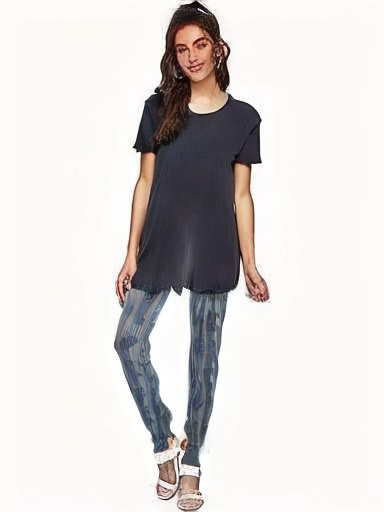

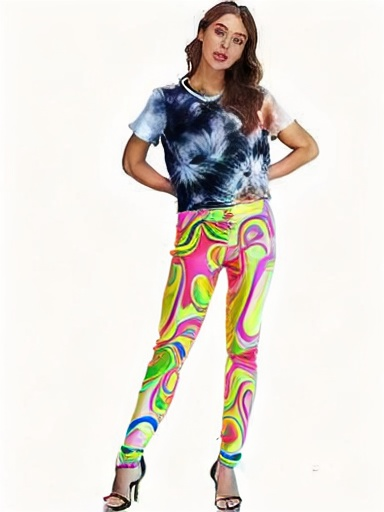

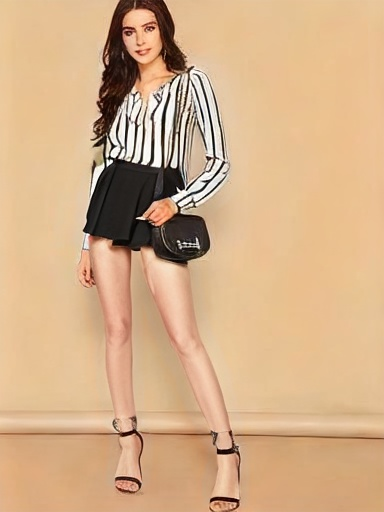

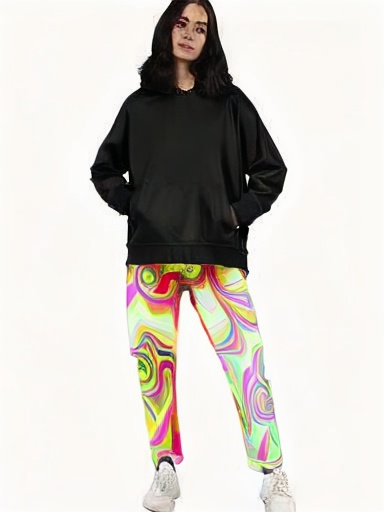

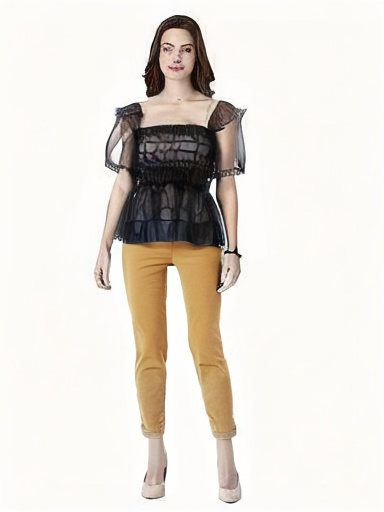

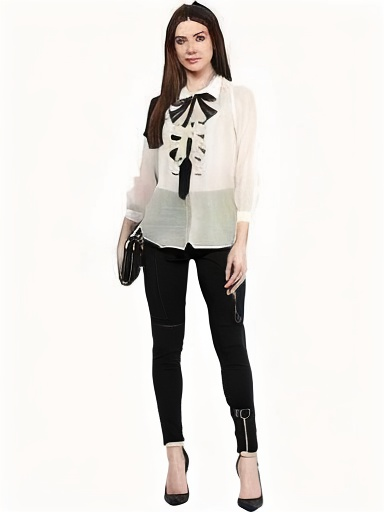

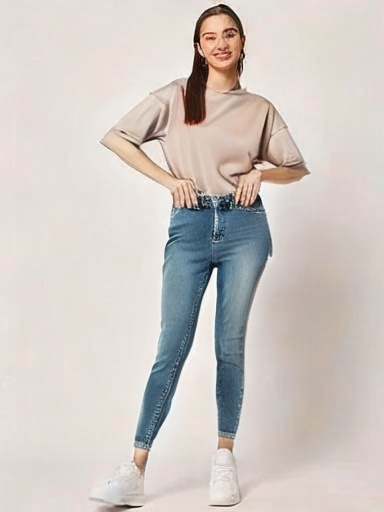

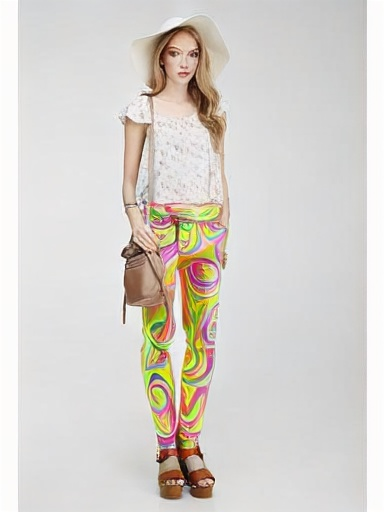

In [45]:
from google.colab.patches import cv2_imshow
import cv2
import glob

pattern = 'results/unpaired/*/*'
for images in glob.glob(pattern):
    if (images.endswith(".png") or images.endswith(".jpg") or images.endswith(".jpeg")):
      cv2_imshow(cv2.imread(images, cv2.IMREAD_UNCHANGED))

In [46]:
%cd /content/drive/MyDrive/Ladi-vton/ladi-vton

/content/drive/MyDrive/Ladi-vton/ladi-vton


In [47]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 34.7 MB/s eta 0:00:00


In [48]:
import cv2
import os
import glob
import mediapipe
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow

In [49]:
dresscode = 'final'

In [52]:
filepath = os.path.join('input', f"test_pairs_paired.txt")
with open(filepath, 'r') as f:
    lines = f.read().splitlines()
org_paths = sorted(
      [os.path.join('input', category, 'images', line.strip().split()[0]) for line in lines for
        category in ['lower_body', 'upper_body', 'dresses'] if
        os.path.exists(os.path.join('input', category, 'images', line.strip().split()[0]))])
res_paths = sorted(
                [os.path.join('results/unpaired', category, name) for category in ['lower_body', 'upper_body', 'dresses'] for
                 name in os.listdir(os.path.join('results/unpaired', category)) if
                 os.path.exists(os.path.join('results/unpaired', category, name))])

# **use this**

In [56]:
filepath = os.path.join('input', f"test_pairs_paired.txt")
with open(filepath, 'r') as f:
    lines = f.read().splitlines()
org_paths = sorted(
      [os.path.join('input', category, 'images', line.strip().split()[0]) for line in lines for
        category in ['lower_body'] if
        os.path.exists(os.path.join('input', category, 'images', line.strip().split()[0]))])
res_paths = sorted(
                [os.path.join('results/unpaired', category, name) for category in ['lower_body'] for
                 name in os.listdir(os.path.join('results/unpaired', category)) if
                 os.path.exists(os.path.join('results/unpaired', category, name))])

In [53]:
assert len(org_paths) == len(res_paths)
sz = len(org_paths)

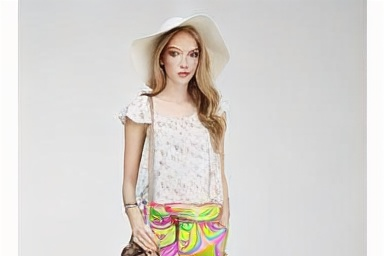

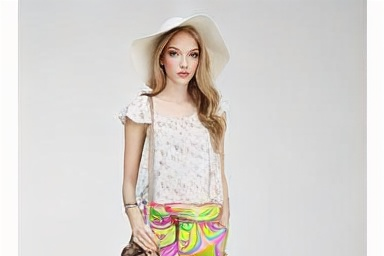

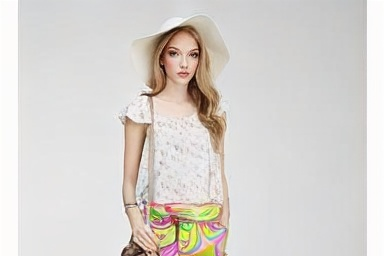

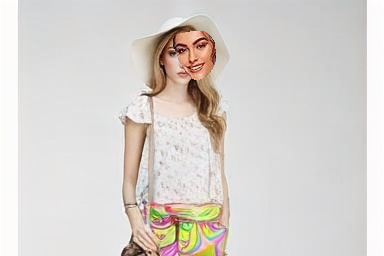

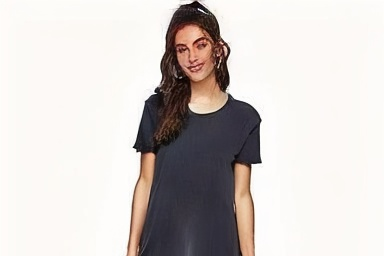

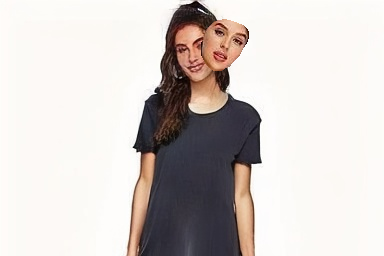

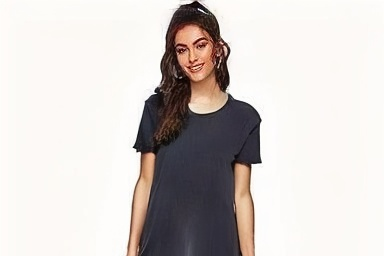

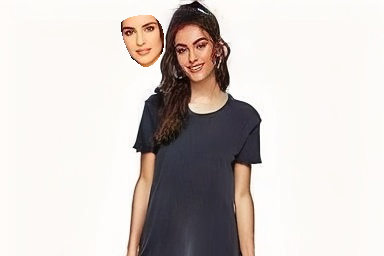

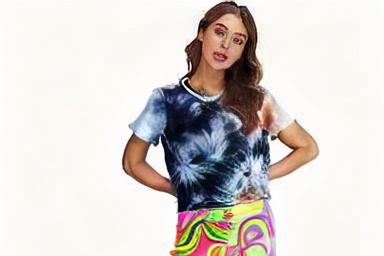

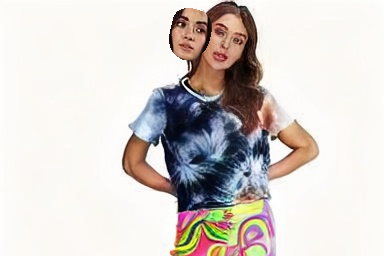

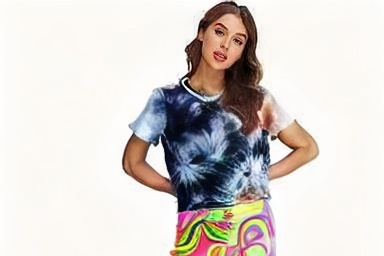

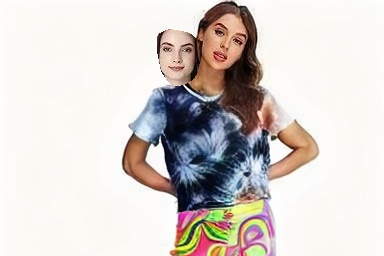

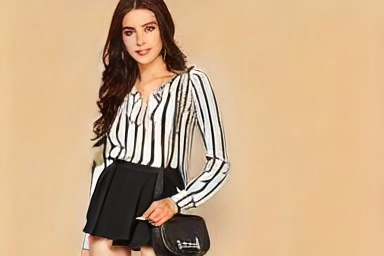

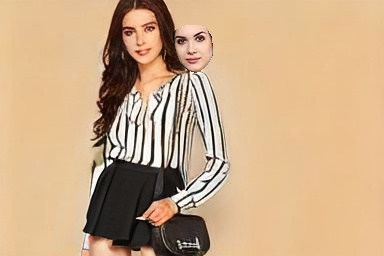

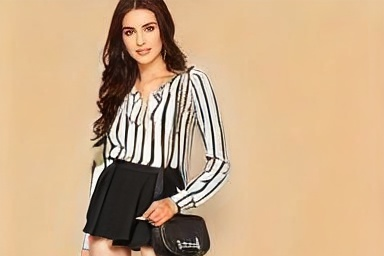

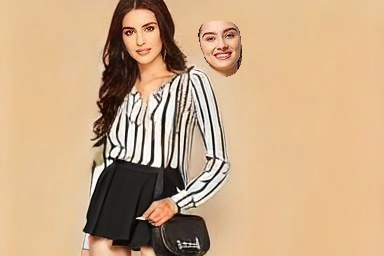

In [58]:
for iter in range(0,sz):
  org_img = cv2.imread(org_paths[iter])
  org_res = cv2.imread(res_paths[iter])
  h,w = int(org_img.shape[0]/2),org_img.shape[1]
  img = org_img[:h,:w]
  res = org_res[:h,:w]
  cv2_imshow(res)
  mp_face_mesh = mediapipe.solutions.face_mesh
  face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)
  results = face_mesh.process(img[:,:,::-1])
  if(results.multi_face_landmarks == None):
     print('miss')
     continue
  landmarks = results.multi_face_landmarks[0]
  df = pd.DataFrame(list(mp_face_mesh.FACEMESH_FACE_OVAL),columns=['p1','p2'])
  routes_idx = []

  p2 = df.iloc[0]['p1']
  p2 = df.iloc[0]['p2']
  for i in range(0,df.shape[0]):
    obj = df[df['p1'] == p2]
    p1 = obj['p1'].values[0]
    p2 = obj['p2'].values[0]

    cur = []
    cur.append(p1)
    cur.append(p2)
    routes_idx.append(cur)

  routes = []
  for sid,tid in routes_idx:
    sxy = landmarks.landmark[sid]
    txy = landmarks.landmark[tid]

    source = (int(sxy.x * img.shape[1]) , int(sxy.y * img.shape[0]))
    target = (int(txy.x * img.shape[1]) , int(txy.y * img.shape[0]))

    routes.append(source)
    routes.append(target)

  mask = np.zeros((img.shape[0],img.shape[1]))
  mask = cv2.fillConvexPoly(mask,np.array(routes),1)
  mask = mask.astype(bool)
  res[mask] = img[mask]
  cv2_imshow(res)
  org_img[:h,:w] = img
  org_res[:h,:w] = res
  cv2.imwrite(res_paths[iter].replace('results/unpaired','final').replace('_0.jpg','_'+dresscode+'.jpg'),org_res)